In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
sns.set_style("whitegrid")
plt.rcParams["patch.force_edgecolor"]=True

In [7]:
from plotly.offline import plot

In [8]:
import plotly.graph_objs as go

In [9]:
import plotly.plotly as py

In [10]:
df = pd.read_csv('crypto-markets.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942297 entries, 0 to 942296
Data columns (total 13 columns):
slug           942297 non-null object
symbol         942297 non-null object
name           942297 non-null object
date           942297 non-null object
ranknow        942297 non-null int64
open           942297 non-null float64
high           942297 non-null float64
low            942297 non-null float64
close          942297 non-null float64
volume         942297 non-null float64
market         942297 non-null float64
close_ratio    942297 non-null float64
spread         942297 non-null float64
dtypes: float64(8), int64(1), object(4)
memory usage: 93.5+ MB


In [12]:
df.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread
count,942297.000000,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,9.422970e+05,942297.000000,9.422970e+05
mean,1000.170608,3.483522e+02,4.085930e+02,2.962526e+02,3.461018e+02,8.720383e+06,1.725060e+08,0.459499,1.123400e+02
std,587.575283,1.318436e+04,1.616386e+04,1.092931e+04,1.309822e+04,1.839802e+08,3.575590e+09,0.326160,6.783713e+03
min,1.000000,2.500000e-09,3.200000e-09,2.500000e-10,2.000000e-10,0.000000e+00,0.000000e+00,-1.000000,0.000000e+00
25%,465.000000,2.321000e-03,2.628000e-03,2.044000e-03,2.314000e-03,1.750000e+02,2.958100e+04,0.162900,0.000000e+00
50%,1072.000000,2.398300e-02,2.680200e-02,2.143700e-02,2.389200e-02,4.278000e+03,5.227960e+05,0.432400,0.000000e+00
75%,1484.000000,2.268600e-01,2.508940e-01,2.043910e-01,2.259340e-01,1.190900e+05,6.874647e+06,0.745800,3.000000e-02
max,2072.000000,2.298390e+06,2.926100e+06,2.030590e+06,2.300740e+06,2.384090e+10,3.265025e+11,1.000000,1.770563e+06


In [13]:
df.isnull().sum()

slug           0
symbol         0
name           0
date           0
ranknow        0
open           0
high           0
low            0
close          0
volume         0
market         0
close_ratio    0
spread         0
dtype: int64

In [14]:
df.head(10)

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32
5,bitcoin,BTC,Bitcoin,2013-05-03,1,106.25,108.13,79.10,97.75,0.0,1.085995e+09,0.6424,29.03
6,bitcoin,BTC,Bitcoin,2013-05-04,1,98.10,115.00,92.50,112.50,0.0,1.250317e+09,0.8889,22.50
7,bitcoin,BTC,Bitcoin,2013-05-05,1,112.90,118.80,107.14,115.91,0.0,1.288693e+09,0.7521,11.66
8,bitcoin,BTC,Bitcoin,2013-05-06,1,115.98,124.66,106.64,112.30,0.0,1.249023e+09,0.3141,18.02
9,bitcoin,BTC,Bitcoin,2013-05-07,1,112.25,113.44,97.70,111.50,0.0,1.240594e+09,0.8767,15.74


In [15]:
df['slug'].nunique()

2071

In [16]:
rank = df[['slug','ranknow']]

In [17]:
rank1=rank[rank['ranknow'] < 11]

In [18]:
rank1.drop_duplicates(inplace=True)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [19]:
rank1

,slug,ranknow
0,bitcoin,1
2042,ripple,2
3986,ethereum,3
5197,stellar,4
6775,bitcoin-cash,5
7270,eos,6
7787,litecoin,7
9829,tether,8
11198,bitcoin-sv,9
11219,cardano,10


In [20]:
bit= df[df['slug']== 'bitcoin']

In [21]:
bit.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread
count,2042.0,2042.000000,2042.000000,2042.000000,2042.000000,2.042000e+03,2.042000e+03,2042.000000,2042.000000
mean,1.0,2285.455421,2354.447723,2207.495544,2287.287272,1.450143e+09,3.785297e+10,0.541097,146.952179
std,0.0,3438.652272,3563.970934,3285.670083,3438.366702,3.042556e+09,5.853611e+10,0.299901,355.994292
min,1.0,68.500000,74.560000,65.530000,68.430000,0.000000e+00,7.784112e+08,0.000000,0.000000
25%,1.0,320.590000,329.070000,313.412500,321.135000,1.868702e+07,4.386274e+09,0.280050,7.245000
50%,1.0,598.015000,607.365000,587.275000,598.140000,5.814580e+07,8.154787e+09,0.559250,19.480000
75%,1.0,2607.887500,2749.390000,2536.247500,2608.680000,1.206027e+09,4.284981e+10,0.808700,117.482500
max,1.0,19475.800000,20089.000000,18974.100000,19497.400000,2.384090e+10,3.265025e+11,1.000000,4110.400000


In [22]:
## pay close attention to the standard deviations, n min max values

In [23]:
bit['close'].max()

19497.4

In [24]:
bit[bit['close']== 19497.4]

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
1693,bitcoin,BTC,Bitcoin,2017-12-16,1,17760.3,19716.7,17515.3,19497.4,1.274060e+10,3.265025e+11,0.9004,2201.4


In [25]:
## Highest closing value for bitcoin was recorded on 16th December, 2017

In [26]:
bit['close'].min()

68.43

In [27]:
bit[bit['close']== 68.43]

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
68,bitcoin,BTC,Bitcoin,2013-07-05,1,79.99,80.0,65.53,68.43,0.0,778411179.0,0.2004,14.47


In [28]:
## Lowest closing value was recorded on 5th July, 2013

In [29]:
bit['date']=pd.to_datetime(bit['date'])

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [30]:
bit['date'].dtype

dtype('<M8[ns]')

In [31]:
## converted object data type to pandas datetime object for later

In [32]:
bit['date'] = bit.date.astype(np.int64)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [33]:
bit['date']=pd.to_datetime(bit['date'])

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [34]:
layout = go.Layout(
    title='Bitcoin High',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Stock Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

data = [go.Scatter(x=bit['date'], y=bit['high'],fill='tozeroy')]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename = 'time-series-bit')

Text(0,0.5,'Closing Price')

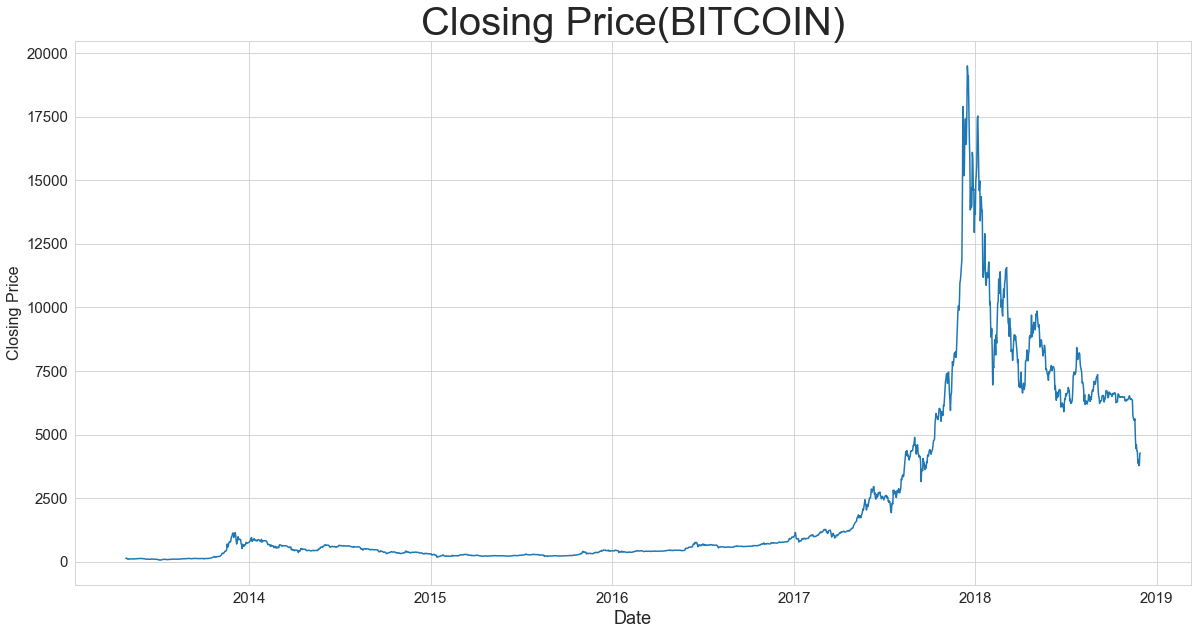

In [35]:
plt.figure(figsize=(20,10))
sns.lineplot(x='date',y='close',data=bit)
plt.title('Closing Price(BITCOIN)',fontdict={'fontsize':40})
plt.tick_params(axis='both',labelsize=15)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price', fontsize=16)

In [36]:
trace = go.Ohlc(x=bit['date'],
                open=bit['open'],
                high=bit['high'],
                low=bit['low'],
                close=bit['close'])
data=[trace]
layout = go.Layout(
    title='Bitcoin Price Variables',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Stock Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='candlestick1')

Text(0,0.5,'Spread')

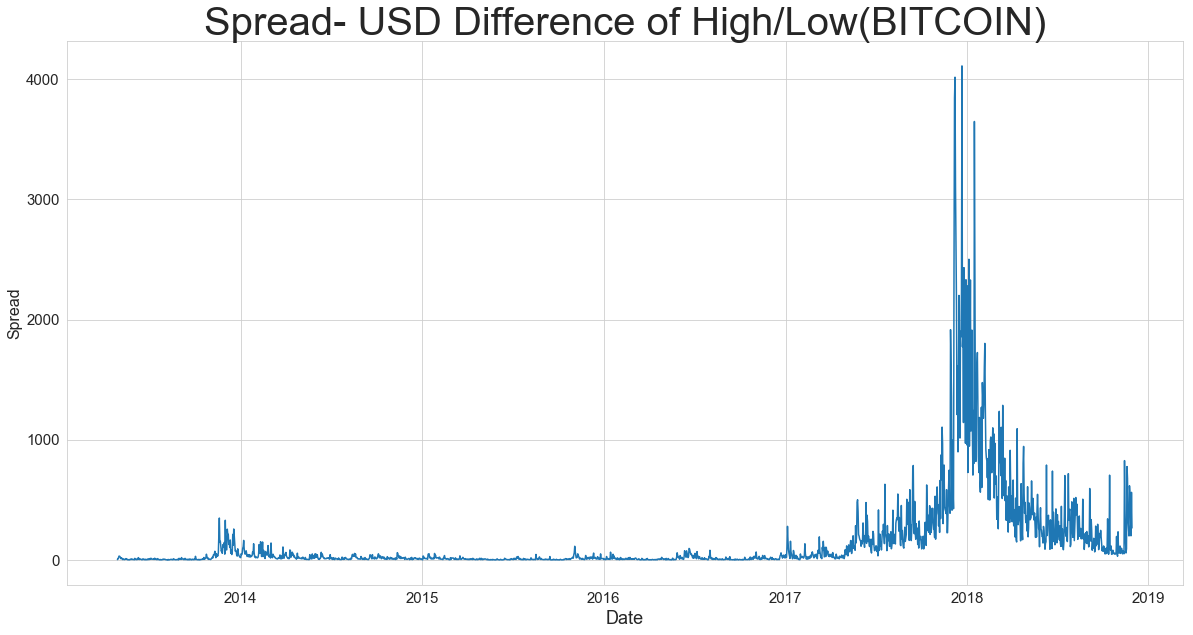

In [37]:
plt.figure(figsize=(20,10))
sns.lineplot(x='date',y='spread',data=bit)
plt.title('Spread- USD Difference of High/Low(BITCOIN)',fontdict={'fontsize':40})
plt.tick_params(axis='both',labelsize=15)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Spread', fontsize=16)

In [38]:
bit.nlargest(10,["spread"])[['spread','date']]

,spread,date
1699,4110.4,2017-12-22
1685,4016.5,2017-12-08
1684,3842.4,2017-12-07
1724,3648.2,2018-01-16
1686,3108.1,2017-12-09
1687,2624.0,2017-12-10
1713,2502.4,2018-01-05
1683,2445.7,2017-12-06
1703,2432.3,2017-12-26
1707,2331.8,2017-12-30


In [39]:
## TOP 10 differences of High and Low values observed mostly in december 2017, and only one in January of 2018
## Bitcoin prices were most volatile on a daily basis in december of 2017.


In [40]:
bit.nsmallest(10,["spread"])[['spread','date']]

,spread,date
101,0.00,2013-08-07
889,1.03,2015-10-04
760,1.17,2015-05-28
769,1.34,2015-06-06
872,1.36,2015-09-17
875,1.46,2015-09-20
1115,1.46,2016-05-17
89,1.47,2013-07-26
104,1.49,2013-08-10
123,1.49,2013-08-29


In [41]:
## Top 10 least volatile days of bitcoin. mostly in 2013 and 2015. 2014 still saw some volatility on a daily basis

Text(0,0.5,'Market')

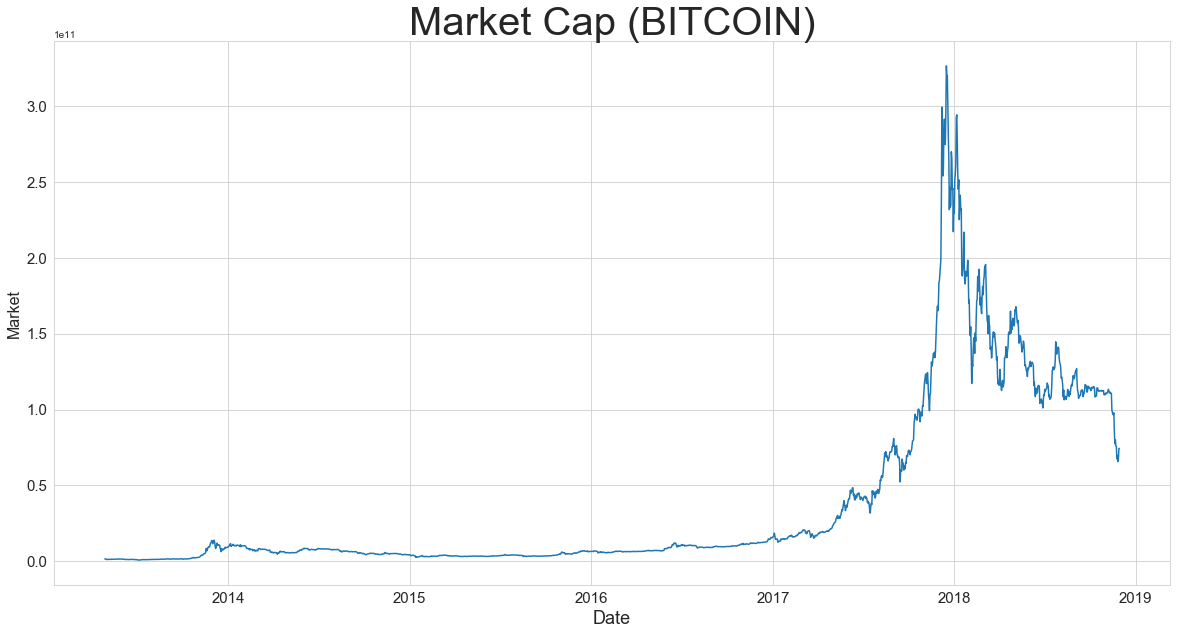

In [42]:
plt.figure(figsize=(20,10))
sns.lineplot(x='date',y='market',data=bit)
plt.title('Market Cap (BITCOIN)',fontdict={'fontsize':40})
plt.tick_params(axis='both',labelsize=15)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Market', fontsize=16)

In [43]:
## Market Analysis presents a more clear image of closing price and/or Spread

In [44]:
rank1

,slug,ranknow
0,bitcoin,1
2042,ripple,2
3986,ethereum,3
5197,stellar,4
6775,bitcoin-cash,5
7270,eos,6
7787,litecoin,7
9829,tether,8
11198,bitcoin-sv,9
11219,cardano,10


In [45]:
four= df[(df['slug']== 'bitcoin')|(df['slug']=='ripple')|(df['slug']=='ethereum')|(df['slug']=='litecoin')]

In [46]:
four.head(10)

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32
5,bitcoin,BTC,Bitcoin,2013-05-03,1,106.25,108.13,79.10,97.75,0.0,1.085995e+09,0.6424,29.03
6,bitcoin,BTC,Bitcoin,2013-05-04,1,98.10,115.00,92.50,112.50,0.0,1.250317e+09,0.8889,22.50
7,bitcoin,BTC,Bitcoin,2013-05-05,1,112.90,118.80,107.14,115.91,0.0,1.288693e+09,0.7521,11.66
8,bitcoin,BTC,Bitcoin,2013-05-06,1,115.98,124.66,106.64,112.30,0.0,1.249023e+09,0.3141,18.02
9,bitcoin,BTC,Bitcoin,2013-05-07,1,112.25,113.44,97.70,111.50,0.0,1.240594e+09,0.8767,15.74


In [47]:
four['date']=pd.to_datetime(four['date'])

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [48]:
four['date'] = four.date.astype(np.int64)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [49]:
four['date']=pd.to_datetime(four['date'])

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [50]:
four1= four[['date','slug','close']]

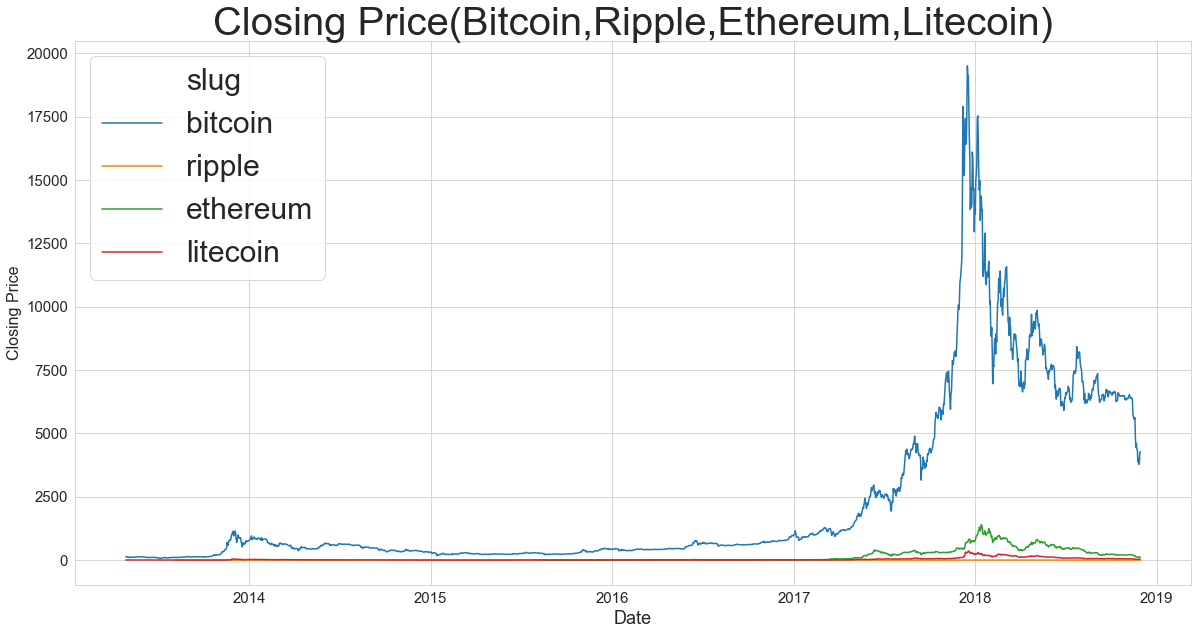

In [51]:
plt.figure(figsize=(20,10))
sns.lineplot(x='date',y='close',data=four1,hue='slug')
plt.title('Closing Price(Bitcoin,Ripple,Ethereum,Litecoin)',fontdict={'fontsize':40})
plt.tick_params(axis='both',labelsize=15)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price', fontsize=16)
plt.legend(prop={'size':30})

In [52]:
## Using bitcoin in the same graph makes it difficult for us to examine the other currencies.
## therefore we will use the other 3 (+ stellar) seperately 
## Using ripple, ethereum and litecoin as I have heard these names the most times(after Bitcoin ofc)

In [53]:
three= df[(df['slug']=='ripple')|(df['slug']=='ethereum')|(df['slug']=='litecoin')|(df['slug']=='stellar')]

In [54]:
three['date']=pd.to_datetime(three['date'])

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [55]:
three['date'] = three.date.astype(np.int64)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [56]:
three['date']=pd.to_datetime(three['date'])

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



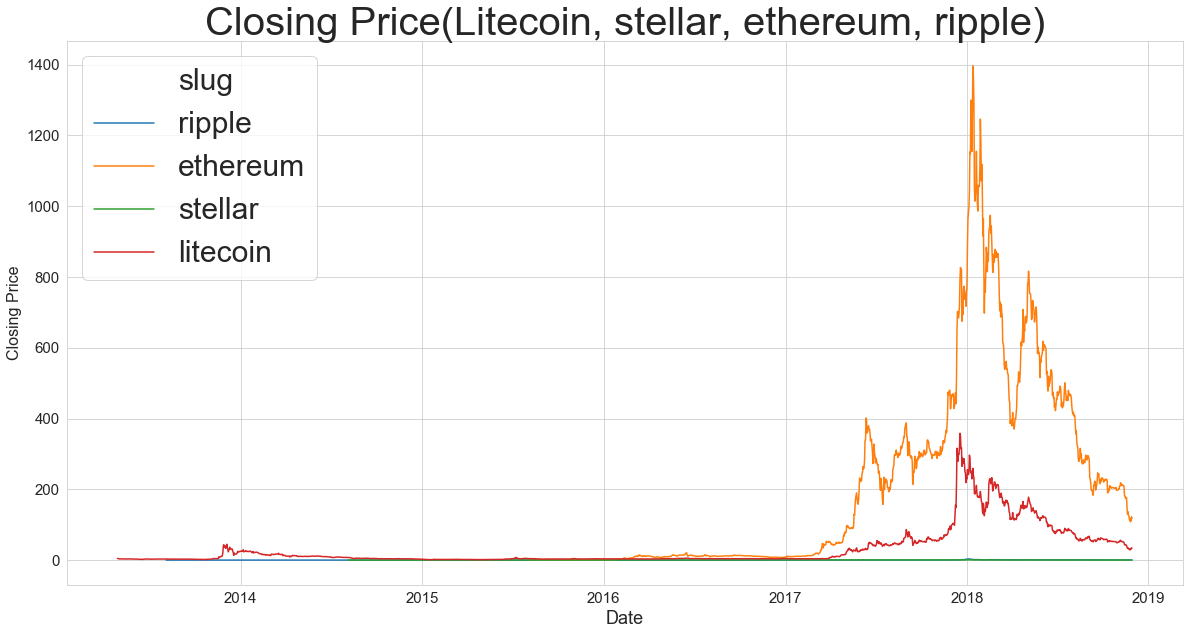

In [57]:
plt.figure(figsize=(20,10))
sns.lineplot(x='date',y='close',data=three,hue='slug')
plt.title('Closing Price(Litecoin, stellar, ethereum, ripple)',fontdict={'fontsize':40})
plt.tick_params(axis='both',labelsize=15)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price', fontsize=16)
plt.legend(prop={'size':30})

In [58]:
## ethereum and litecoin show a very similar trend to bitcoin. Mid 2017 volatility increase.
## peaking in end of 2017 or begining of 2018
## will use new graph for ripple n stellar as they are very low priced

In [59]:
two= df[(df['slug']=='ripple')|(df['slug']=='stellar')]

In [60]:
two['date']=pd.to_datetime(two['date'])

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [61]:
two['date'] = two.date.astype(np.int64)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [62]:
two['date']=pd.to_datetime(two['date'])

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



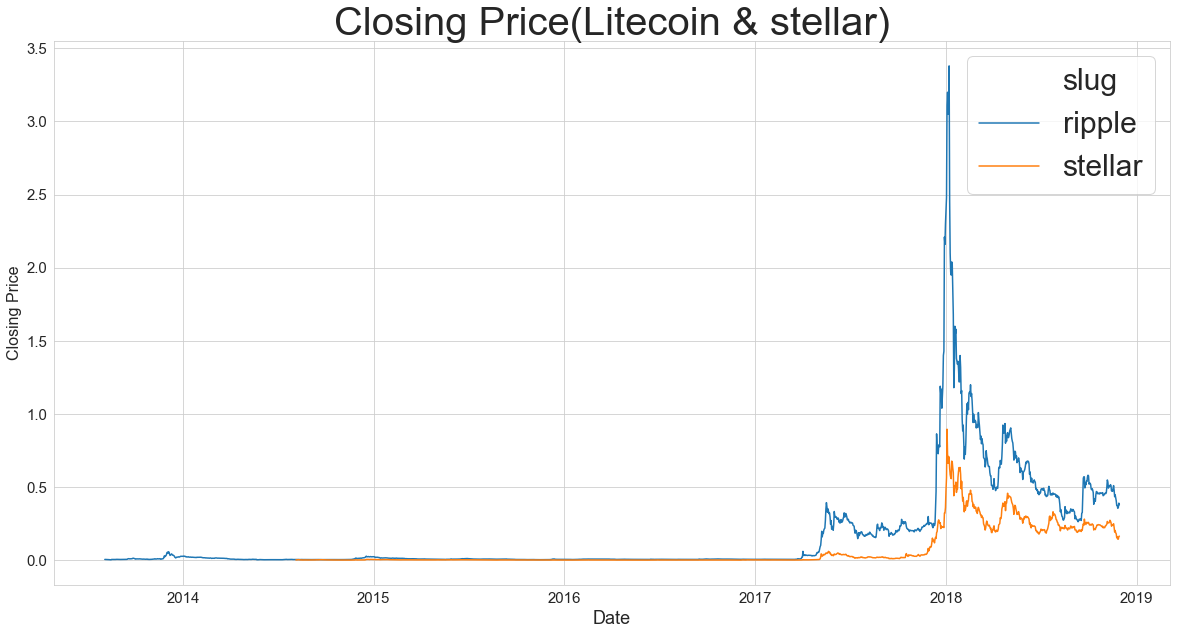

In [63]:
plt.figure(figsize=(20,10))
sns.lineplot(x='date',y='close',data=two,hue='slug')
plt.title('Closing Price(Litecoin & stellar)',fontdict={'fontsize':40})
plt.tick_params(axis='both',labelsize=15)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price', fontsize=16)
plt.legend(prop={'size':30})

In [64]:
## Ripple and Stellar both are very low priced currencies on the market
## yet they show the same trends exhibited by bitcoin. 
## Mid 2017 prices jump up. peak volatility at end of 2017 and begining of 2018.
## Basically, bitcoin is the biggest currency on the market that controls the trend of all currencies
## There is no comparison of the magnitude of volatility between all the top 10 currencies because bitcoin tops them with a massive spread.
## Meaning most money to be made and to be lost was in bitcoin

In [65]:
df.nlargest(10,'spread')

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
941960,project-x,NANOX,Project-X,2017-12-27,1727,2280580.0,2550090.0,779527.0,855170.0,54631.0,66929.0,0.0427,1770563.0
941952,project-x,NANOX,Project-X,2017-12-19,1727,95667.7,1762800.0,88793.4,971750.0,52119.0,76053.0,0.5275,1674006.6
941473,bit20,BTWTY,Bit20,2018-02-04,1505,1450670.0,2462910.0,1069270.0,1120460.0,488.0,1138387.0,0.0367,1393640.0
941779,project-x,NANOX,Project-X,2017-06-28,1727,356769.0,1540320.0,205568.0,1532950.0,3250.0,0.0,0.9945,1334752.0
941957,project-x,NANOX,Project-X,2017-12-24,1727,1446030.0,2633290.0,1331690.0,1866850.0,322658.0,146107.0,0.4112,1301600.0
941780,project-x,NANOX,Project-X,2017-06-29,1727,1531520.0,1536280.0,254544.0,505416.0,801.0,0.0,0.1957,1281736.0
941751,project-x,NANOX,Project-X,2017-05-31,1727,440217.0,1661230.0,413046.0,708415.0,1948.0,0.0,0.2366,1248184.0
941956,project-x,NANOX,Project-X,2017-12-23,1727,524007.0,1675560.0,434562.0,1430240.0,64003.0,111936.0,0.8023,1240998.0
941958,project-x,NANOX,Project-X,2017-12-25,1727,1884830.0,2708300.0,1481080.0,2300740.0,126628.0,180065.0,0.6679,1227220.0
941466,bit20,BTWTY,Bit20,2018-01-28,1505,1319460.0,2095400.0,1070990.0,1170780.0,5327.0,1189512.0,0.0974,1024410.0


In [66]:
## project-x and bit20 appear to have the largest spread out of all the currencies however they are irrelevant
## Still interesting to see highest spread recorded was between mid 2017 and early 2018.


In [67]:
df['date']= pd.to_datetime(df['date'])

In [68]:
df = df[(df['date'] > '2017-01-01')]

In [69]:
df.groupby(by='slug',sort=False)['close'].max().head(10)

slug
bitcoin         19497.400000
ripple              3.380000
ethereum         1396.420000
stellar             0.896227
bitcoin-cash     3923.070000
eos                21.540000
litecoin          358.340000
tether              1.080000
bitcoin-sv        208.400000
cardano             1.110000
Name: close, dtype: float64

In [70]:
bottom= df[(df['slug']=='bitcoin-cash')|(df['slug']=='eos')|(df['slug']=='litecoin')|(df['slug']=='bitcoin-sv')]

In [71]:
bottom2= df[(df['slug']=='tether')|(df['slug']=='cardano')]

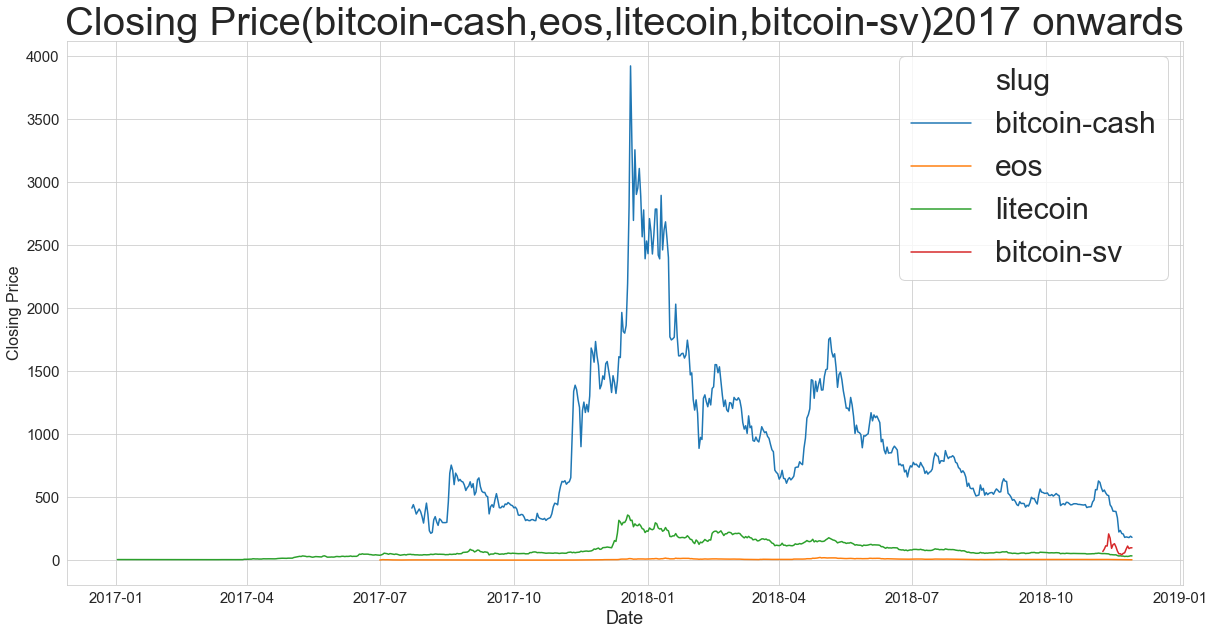

In [72]:
plt.figure(figsize=(20,10))
sns.lineplot(x='date',y='close',data=bottom,hue='slug')
plt.title('Closing Price(bitcoin-cash,eos,litecoin,bitcoin-sv)2017 onwards',fontdict={'fontsize':40})
plt.tick_params(axis='both',labelsize=15)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price', fontsize=16)
plt.legend(prop={'size':30})

In [73]:
bottom3= df[(df['slug']=='eos')|(df['slug']=='litecoin')|(df['slug']=='bitcoin-sv')]

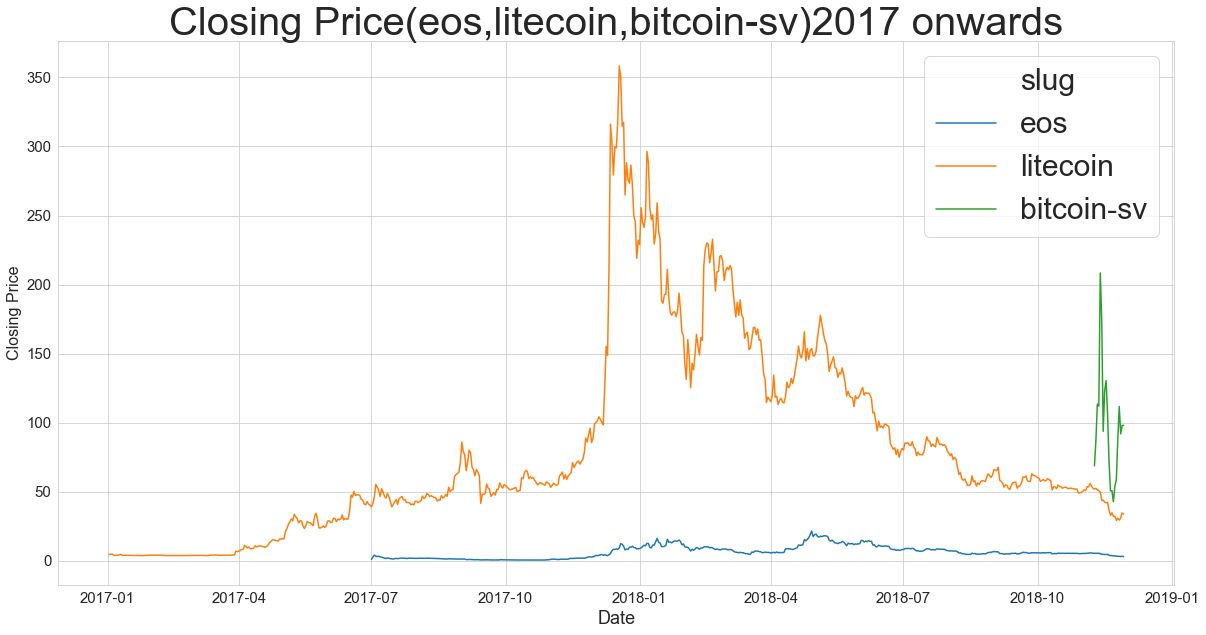

In [74]:
plt.figure(figsize=(20,10))
sns.lineplot(x='date',y='close',data=bottom3,hue='slug')
plt.title('Closing Price(eos,litecoin,bitcoin-sv)2017 onwards',fontdict={'fontsize':40})
plt.tick_params(axis='both',labelsize=15)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price', fontsize=16)
plt.legend(prop={'size':30})

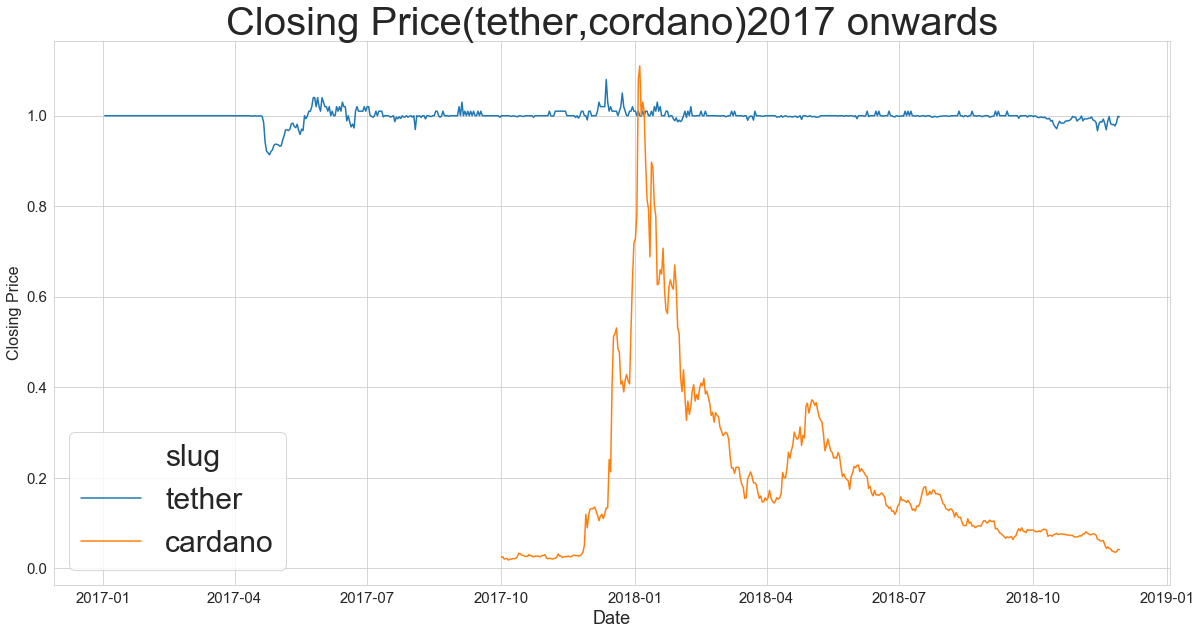

In [75]:
plt.figure(figsize=(20,10))
sns.lineplot(x='date',y='close',data=bottom2,hue='slug')
plt.title('Closing Price(tether,cordano)2017 onwards',fontdict={'fontsize':40})
plt.tick_params(axis='both',labelsize=15)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price', fontsize=16)
plt.legend(prop={'size':30})

In [76]:
## Cardano which was a new currency followed the same relative trend of bitcoin

In [77]:
bottom4= df[(df['slug']=='bitcoin')|(df['slug']=='bitcoin-cash')]

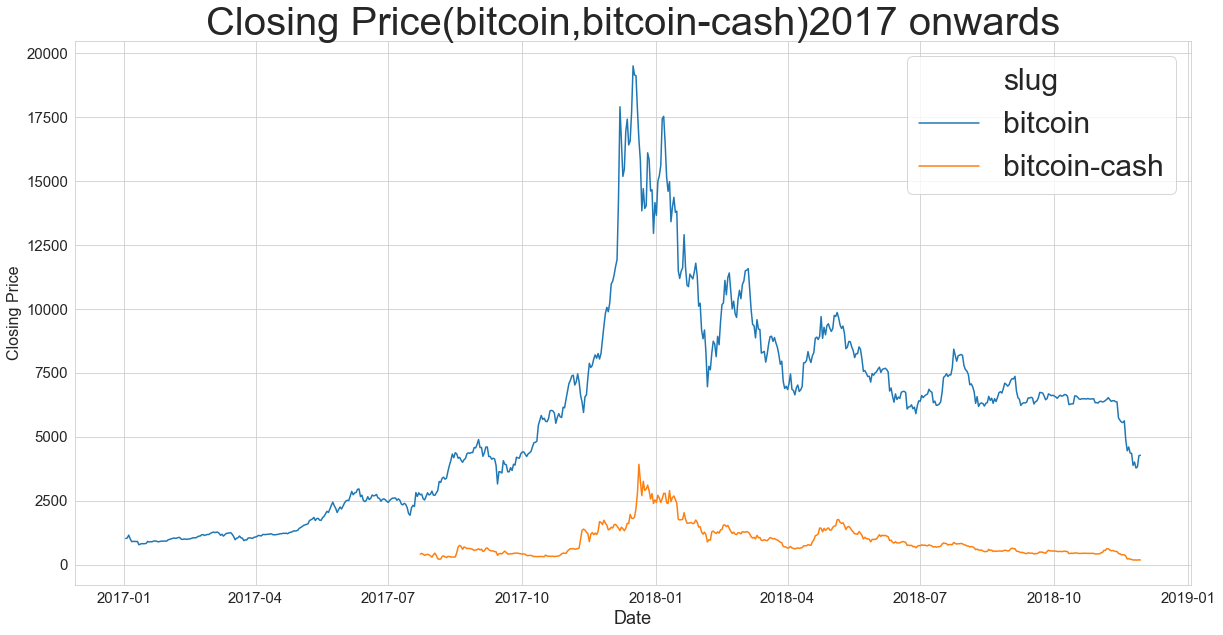

In [78]:
plt.figure(figsize=(20,10))
sns.lineplot(x='date',y='close',data=bottom4,hue='slug')
plt.title('Closing Price(bitcoin,bitcoin-cash)2017 onwards',fontdict={'fontsize':40})
plt.tick_params(axis='both',labelsize=15)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price', fontsize=16)
plt.legend(prop={'size':30})

In [79]:
## Closer look at 2017-2018 bitcoin/bitcoin cash